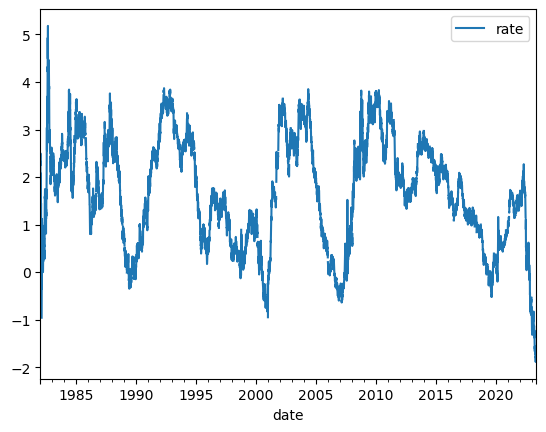

,id,date,rate
0,1,1982-01-04,2.32
1,2,1982-01-05,2.24
2,3,1982-01-06,2.43
3,4,1982-01-07,2.46
4,5,1982-01-08,2.50


In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect('data/db.sqlite')
df = pd.read_sql_query("SELECT * FROM yield_curve", conn)
df["rate"] = pd.to_numeric(df["rate"], errors="coerce")
df["date"] = pd.to_datetime(df["date"])

df.plot(x="date", y="rate")
plt.show()
df.head()


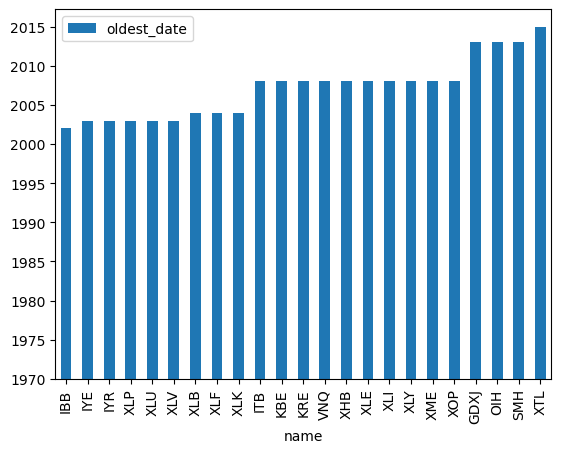

,open,name,oldest_date
0,30.16667,IBB,2002-01-02
1,13.43988,IYE,2003-01-02
2,38.68000,IYR,2003-01-02
3,20.26000,XLP,2003-01-02
4,19.24000,XLU,2003-01-02
5,27.00000,XLV,2003-01-02
6,26.85000,XLB,2004-01-02
7,22.91698,XLF,2004-01-02
8,20.57000,XLK,2004-01-02
9,17.75000,ITB,2008-01-02


In [6]:
df1 = pd.read_sql_query("SELECT open, name, MIN(date) AS oldest_date FROM sector_etfs GROUP BY name ORDER BY oldest_date;", conn)

df1["oldest_date"] = pd.to_datetime(df1["oldest_date"])

df1.plot(kind="bar", x="name", y="oldest_date")
plt.show()
df1.head(22)

In [55]:
etf_df = pd.read_sql_query("SELECT * FROM sector_etfs;", conn)
etf_df["date"] = pd.to_datetime(etf_df["date"])
etf_df["open"] = pd.to_numeric(etf_df["open"], errors="coerce")
etf_df["close"] = pd.to_numeric(etf_df["close"], errors="coerce")
etf_df["high"] = pd.to_numeric(etf_df["high"], errors="coerce")
etf_df["low"] = pd.to_numeric(etf_df["low"], errors="coerce")

start_date = '2013-01-01'
end_date = '2023-12-31'

etf_df = etf_df.loc[(etf_df['date'] >= start_date) & (etf_df['date'] <= end_date)]

etf_df.set_index('date', inplace=True)

etf_df

,id,name,open,high,low,close,volume
date,,,,,,,
2023-05-24,1,XLY,149.38,149.930,147.99,149.15,982881
2023-05-23,2,XLY,149.92,151.830,149.41,149.70,1143280
2023-05-22,3,XLY,151.62,152.070,150.57,151.08,999034
2023-05-19,4,XLY,152.46,152.530,150.79,151.55,952884
2023-05-18,5,XLY,150.82,152.885,150.80,152.83,1121266
...,...,...,...,...,...,...,...
2013-01-08,99089,VNQ,67.08,67.200,66.75,66.94,216906
2013-01-07,99090,VNQ,67.01,67.120,66.76,67.07,492570
2013-01-04,99091,VNQ,66.81,66.950,66.52,66.88,558374


               id name    open    high     low   close  volume
date                                                          
2023-05-24  90731  OIH  266.31  270.07  263.92  267.92   99852
2023-05-23  90732  OIH  267.30  268.42  263.98  265.65   74843
2023-05-22  90733  OIH  260.20  266.80  260.20  264.87  153155
2023-05-19  90734  OIH  262.76  262.99  258.25  260.01  110927
2023-05-18  90735  OIH  254.65  259.67  250.75  259.26  118028
...           ...  ...     ...     ...     ...     ...     ...
2013-01-08  93342  OIH  803.20  805.40  797.20  802.40   22226
2013-01-07  93343  OIH  808.40  812.40  806.00  810.80   15250
2013-01-04  93344  OIH  798.40  813.30  798.40  812.80   43714
2013-01-03  93345  OIH  791.20  807.60  790.00  797.00   35081
2013-01-02  93346  OIH  792.40  795.20  781.60  794.60   30978

[2616 rows x 7 columns]


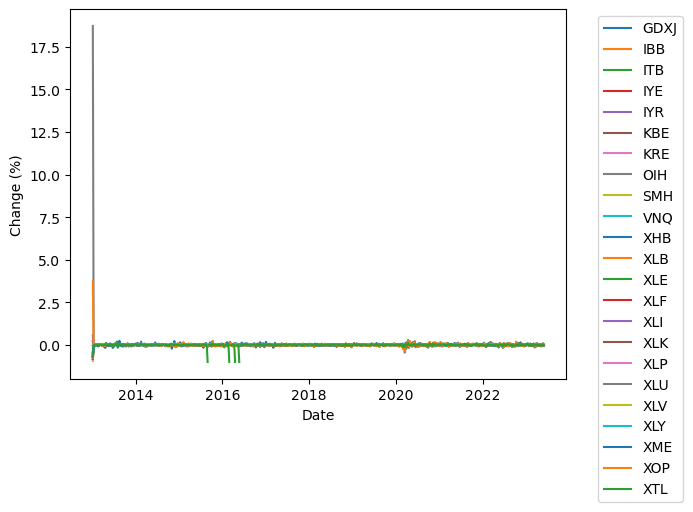

                      id name   open   high    low  close     volume    change
name date                                                                     
VNQ  2013-01-06  99091.0  VNQ  66.81  66.95  66.52  66.88   558374.0 -0.481007
     2013-01-13  99086.0  VNQ  67.29  67.36  66.91  67.17   392013.0  0.007185
     2013-01-20  99081.0  VNQ  67.89  68.09  67.69  68.09   447315.0  0.008917
     2013-01-27  99077.0  VNQ  68.80  68.99  68.61  68.95   425707.0  0.013404
     2013-02-03  99072.0  VNQ  68.62  68.86  68.36  68.65   661440.0 -0.002616
...                  ...  ...    ...    ...    ...    ...        ...       ...
     2023-04-30  96495.0  VNQ  82.42  83.70  82.21  83.30  1632119.0  0.000364
     2023-05-07  96490.0  VNQ  82.11  83.17  82.10  82.99  1102558.0 -0.003761
     2023-05-14  96485.0  VNQ  82.20  82.29  81.36  82.03   652712.0  0.001096
     2023-05-21  96480.0  VNQ  80.89  81.30  80.01  80.40  1013516.0 -0.015937
     2023-05-28  96477.0  VNQ  79.68  79.90  78.33  

In [118]:
print(etf_df[etf_df["name"] == "OIH"])
weekly_etf_df = etf_df.groupby('name').resample('W').last()
weekly_etf_df['change'] = weekly_etf_df['open'].pct_change()
weekly_etf_df.dropna(inplace=True)

"""weekly_etf_df.groupby('name')['change'].plot(legend=True)
plt.ylabel('change')
plt.show()"""

fig, ax = plt.subplots()
for name in weekly_etf_df['name'].unique():
    if name == None:
        continue
    data = weekly_etf_df[weekly_etf_df['name'] == name]
    data = data.unstack(level="name")
    ax.plot(data.index, data['change'], label=name)

ax.set_ylabel('Change (%)')
ax.set_xlabel('Date')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

print(weekly_etf_df[weekly_etf_df["name"] == "VNQ"])